In [13]:
import numpy as np
import pandas as pd
import datetime
import os
import matplotlib.pyplot as plt
import matplotlib
import networkx as nx
import pickle
from collections import OrderedDict
import copy
from scipy.sparse import csr_matrix
from scipy import io
import seaborn as sns
import joblib
from base import *
from joblib import Parallel, delayed
import random
import scipy as sc
import sys

In [14]:
from itertools import islice
def k_shortest_paths(G, source, target, k, weight=None):
    def path_cost(G, path):
        return sum([G[path[i]][path[i+1]]['length'] for i in range(len(path)-1)])
    p = list(islice(nx.shortest_simple_paths(G, source, target, weight=weight), k))
    #print('p',p)
#     if(len(p) < k) or (len(p[k-1]) <= 0):
#         return (float('inf'), [])
#     else:
#         return [path_cost(G,p[k-1]), p[k-1]]
    return p

#print(k_shortest_paths(G,737184,718421,1,weight='length'))

In [15]:
start_month=9
start_day=27
end_month=9
end_day=27
year =2020

file_month=9
file_day=18
file_year =2022

penalty_beta = 10
penalty_gamma = 1

start_date = datetime.date(year, start_month, start_day)
end_date = datetime.date(year, end_month, end_day)
file_date = datetime.date(file_year, file_month, file_day)

## Calculate Path

In [11]:
import importlib
importlib.reload(sys.modules['base'])

start_month=3
start_day=1
end_month=3
end_day=10
year =2020
flag_weekday = 1

# read_in_folder = '../Raw_data/Processed_data/highway_' + str(year) + '/month_'+ str(start_month) +'_'+str(year)+'/'
read_in_folder = './Processed_data/20200320_large/'
with open(read_in_folder+'od_list.pickle', 'rb') as handle:
    (O_list, D_list) = pickle.load(handle)
# with open('graph.pickle', 'rb') as handle:
#     G = pickle.load(handle)
G = nx.read_gpickle(read_in_folder+'graph_4.pickle')

OD_paths = OrderedDict()
link_dict = OrderedDict()
path_list = list()
# O_list = O_list[:]
# D_list = D_list[:]
shortest_path_list = list()
count = 0;
k=0
N_path = 1
# while len(shortest_path_list) < N_path:
OD_list_output = []
print(O_list)
for O in O_list:
    for D in O_list:
        print(O, D);
        if O!=D:
            try:
                paths = k_shortest_paths(G,O, D,N_path,weight='length') #My code
                print('paths, ',paths)
                if len(paths) != 0:
                    tmp_path_list = list()
                    for path in paths:
                        path_o = Path()
                        path_o.node_list = path
                        path_o.node_to_list(G, link_dict)
                        print(path_o.cost)
                        tmp_path_list.append(path_o)
                        path_list.append(path_o)
                        
                    OD_paths[(O, D)] = tmp_path_list
                    shortest_path_list.append(paths)
                    OD_list_output.append([O,D])
                    print("From ", O, " To ", D, "there are ", N_path, "paths")
                else:
                    pass
            except:
#                     print("From ", O, " To ", D, "there are no paths")
                pass
        else:
#                 print("From ", O, " To ", D, "same")
            pass

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51]
0 0
0 1
paths,  [[0, 1]]
5.911740321184936
From  0  To  1 there are  1 paths
0 2
paths,  [[0, 1, 41, 33, 34, 37, 2]]
46.71688251917065
From  0  To  2 there are  1 paths
0 3
paths,  [[0, 1, 41, 33, 34, 37, 2, 3]]
64.7847898659072
From  0  To  3 there are  1 paths
0 4
paths,  [[0, 1, 16, 7, 4]]
26.583642382959077
From  0  To  4 there are  1 paths
0 5
paths,  [[0, 1, 16, 7, 4, 5]]
36.02129478781398
From  0  To  5 there are  1 paths
0 6
paths,  [[0, 1, 16, 7, 4, 5, 6]]
42.74119829180726
From  0  To  6 there are  1 paths
0 7
paths,  [[0, 1, 16, 7]]
18.747222313739826
From  0  To  7 there are  1 paths
0 8
paths,  [[0, 1, 16, 7, 10, 8]]
40.69071460251563
From  0  To  8 there are  1 paths
0 9
paths,  [[0, 1, 41, 33, 32, 31, 9]]
34.63644753966257
From  0  To  9 there are  1 paths
0 10
paths,  [[0, 1

3 18
paths,  [[3, 2, 22, 51, 18]]
34.80753576850603
From  3  To  18 there are  1 paths
3 19
paths,  [[3, 48, 20, 50, 12, 26, 19]]
49.257475147324435
From  3  To  19 there are  1 paths
3 20
paths,  [[3, 48, 20]]
19.517854553957253
From  3  To  20 there are  1 paths
3 21
paths,  [[3, 2, 22, 51, 18, 6, 21]]
41.74609921004565
From  3  To  21 there are  1 paths
3 22
paths,  [[3, 2, 22]]
21.19625683920222
From  3  To  22 there are  1 paths
3 23
paths,  [[3, 2, 22, 51, 18, 6, 5, 24, 23]]
55.365205609066805
From  3  To  23 there are  1 paths
3 24
paths,  [[3, 2, 22, 51, 18, 6, 5, 24]]
48.43336248278725
From  3  To  24 there are  1 paths
3 25
paths,  [[3, 48, 20, 50, 12, 26, 19, 25]]
57.03880481324233
From  3  To  25 there are  1 paths
3 26
paths,  [[3, 48, 20, 50, 12, 26]]
44.30637426677689
From  3  To  26 there are  1 paths
3 27
paths,  [[3, 48, 20, 50, 12, 13, 45, 27]]
75.8316756332173
From  3  To  27 there are  1 paths
3 28
paths,  [[3, 48, 20, 50, 12, 13, 45, 27, 28]]
118.39160580775905
Fr

paths,  [[6, 18, 35, 34, 31]]
24.578436113454313
From  6  To  31 there are  1 paths
6 32
paths,  [[6, 18, 35, 34, 32]]
23.550264002160198
From  6  To  32 there are  1 paths
6 33
paths,  [[6, 18, 35, 34, 33]]
23.920519618400746
From  6  To  33 there are  1 paths
6 34
paths,  [[6, 18, 35, 34]]
18.87566939939748
From  6  To  34 there are  1 paths
6 35
paths,  [[6, 18, 35]]
14.249575897323542
From  6  To  35 there are  1 paths
6 36
paths,  [[6, 18, 35, 36]]
16.71069510401913
From  6  To  36 there are  1 paths
6 37
paths,  [[6, 18, 35, 36, 37]]
19.723500905473045
From  6  To  37 there are  1 paths
6 38
paths,  [[6, 5, 4, 38]]
22.000012446838
From  6  To  38 there are  1 paths
6 39
paths,  [[6, 5, 4, 7, 16, 1, 39]]
42.634719747227784
From  6  To  39 there are  1 paths
6 40
paths,  [[6, 18, 35, 34, 32, 40]]
31.88486524773898
From  6  To  40 there are  1 paths
6 41
paths,  [[6, 18, 35, 34, 33, 41]]
31.040200087565275
From  6  To  41 there are  1 paths
6 42
paths,  [[6, 5, 42]]
11.7025664215714

56.388664149767315
From  9  To  44 there are  1 paths
9 45
paths,  [[9, 31, 30, 26, 13, 45]]
34.832628621589464
From  9  To  45 there are  1 paths
9 46
paths,  [[9, 31, 34, 35, 18, 46]]
38.072291411342476
From  9  To  46 there are  1 paths
9 47
paths,  [[9, 31, 34, 35, 18, 6, 21, 47]]
41.50625863461107
From  9  To  47 there are  1 paths
9 48
paths,  [[9, 31, 34, 37, 2, 20, 48]]
54.02603773231033
From  9  To  48 there are  1 paths
9 49
paths,  [[9, 31, 34, 36, 22, 49]]
48.51419086690704
From  9  To  49 there are  1 paths
9 50
paths,  [[9, 31, 30, 26, 12, 50]]
33.439898383031604
From  9  To  50 there are  1 paths
9 51
paths,  [[9, 31, 34, 35, 18, 51]]
35.239266866448496
From  9  To  51 there are  1 paths
10 0
paths,  [[10, 7, 16, 1, 0]]
30.44545884342577
From  10  To  0 there are  1 paths
10 1
paths,  [[10, 7, 16, 1]]
24.533718522240832
From  10  To  1 there are  1 paths
10 2
paths,  [[10, 11, 24, 5, 6, 18, 51, 22, 2]]
41.75535940084137
From  10  To  2 there are  1 paths
10 3
paths,  [[1

paths,  [[13, 26, 30, 31, 34, 35]]
26.193159890897444
From  13  To  35 there are  1 paths
13 36
paths,  [[13, 26, 30, 31, 34, 36]]
27.116219513411906
From  13  To  36 there are  1 paths
13 37
paths,  [[13, 26, 30, 31, 34, 37]]
27.552265586820063
From  13  To  37 there are  1 paths
13 38
paths,  [[13, 26, 30, 31, 32, 33, 38]]
28.936355047159765
From  13  To  38 there are  1 paths
13 39
paths,  [[13, 26, 30, 31, 32, 33, 41, 1, 39]]
43.39566279193921
From  13  To  39 there are  1 paths
13 40
paths,  [[13, 26, 19, 25, 40]]
26.152520508081967
From  13  To  40 there are  1 paths
13 41
paths,  [[13, 26, 30, 31, 32, 33, 41]]
29.752549754592167
From  13  To  41 there are  1 paths
13 42
paths,  [[13, 26, 30, 31, 34, 35, 42]]
32.68677890754987
From  13  To  42 there are  1 paths
13 43
paths,  [[13, 26, 19, 29, 43]]
34.93190942417273
From  13  To  43 there are  1 paths
13 44
paths,  [[13, 26, 19, 29, 43, 15, 44]]
62.07400405903843
From  13  To  44 there are  1 paths
13 45
paths,  [[13, 45]]
11.969

17 9
paths,  [[17, 27, 43, 29, 19, 30, 31, 9]]
59.422845010524384
From  17  To  9 there are  1 paths
17 10
paths,  [[17, 27, 43, 15, 39, 1, 16, 7, 10]]
73.96447933303843
From  17  To  10 there are  1 paths
17 11
paths,  [[17, 27, 43, 29, 25, 40, 32, 33, 38, 4, 11]]
74.07702650252313
From  17  To  11 there are  1 paths
17 12
paths,  [[17, 27, 45, 13, 12]]
51.36543997600152
From  17  To  12 there are  1 paths
17 13
paths,  [[17, 27, 45, 13]]
43.49476436559533
From  17  To  13 there are  1 paths
17 14
paths,  [[17, 27, 43, 29, 25, 40, 32, 34, 35, 18, 6, 21, 14]]
90.10468572543212
From  17  To  14 there are  1 paths
17 15
paths,  [[17, 27, 43, 15]]
34.40777263701061
From  17  To  15 there are  1 paths
17 16
paths,  [[17, 27, 43, 15, 39, 1, 16]]
55.10251883050054
From  17  To  16 there are  1 paths
17 17
17 18
paths,  [[17, 27, 43, 29, 25, 40, 32, 34, 35, 18]]
73.32758744963883
From  17  To  18 there are  1 paths
17 19
paths,  [[17, 27, 43, 29, 19]]
43.05581078152705
From  17  To  19 there 

From  21  To  12 there are  1 paths
21 13
paths,  [[21, 6, 18, 35, 34, 31, 30, 26, 13]]
44.602303549185585
From  21  To  13 there are  1 paths
21 14
paths,  [[21, 14]]
9.83853483425367
From  21  To  14 there are  1 paths
21 15
paths,  [[21, 6, 5, 4, 7, 16, 1, 39, 15]]
56.012013905373905
From  21  To  15 there are  1 paths
21 16
paths,  [[21, 6, 5, 4, 7, 16]]
35.31726771188397
From  21  To  16 there are  1 paths
21 17
paths,  [[21, 6, 18, 35, 34, 32, 40, 25, 29, 43, 27, 17]]
80.26615089117846
From  21  To  17 there are  1 paths
21 18
paths,  [[21, 6, 18]]
6.938563441539625
From  21  To  18 there are  1 paths
21 19
paths,  [[21, 6, 18, 35, 34, 31, 30, 19]]
38.106432225505664
From  21  To  19 there are  1 paths
21 20
paths,  [[21, 6, 18, 51, 22, 2, 20]]
30.89796444278723
From  21  To  20 there are  1 paths
21 21
21 22
paths,  [[21, 6, 18, 51, 22]]
20.549842370843436
From  21  To  22 there are  1 paths
21 23
paths,  [[21, 24, 23]]
15.269643963476671
From  21  To  23 there are  1 paths
21 2

39.11978463924779
From  25  To  16 there are  1 paths
25 17
paths,  [[25, 29, 43, 27, 17]]
37.633272442604074
From  25  To  17 there are  1 paths
25 18
paths,  [[25, 40, 32, 34, 35, 18]]
35.694315007034746
From  25  To  18 there are  1 paths
25 19
paths,  [[25, 19]]
7.781329665917893
From  25  To  19 there are  1 paths
25 20
paths,  [[25, 19, 26, 12, 50, 20]]
37.52095025928507
From  25  To  20 there are  1 paths
25 21
paths,  [[25, 40, 32, 34, 35, 18, 6, 21]]
42.63287844857437
From  25  To  21 there are  1 paths
25 22
paths,  [[25, 40, 32, 34, 36, 22]]
38.09207305468121
From  25  To  22 there are  1 paths
25 23
paths,  [[25, 40, 32, 34, 35, 42, 5, 24, 23]]
46.758787380509325
From  25  To  23 there are  1 paths
25 24
paths,  [[25, 40, 32, 34, 35, 42, 5, 24]]
39.82694425422977
From  25  To  24 there are  1 paths
25 25
25 26
paths,  [[25, 19, 26]]
12.732430546465437
From  25  To  26 there are  1 paths
25 27
paths,  [[25, 29, 43, 27]]
24.516159164205895
From  25  To  27 there are  1 paths


From  29  To  19 there are  1 paths
29 20
paths,  [[29, 19, 26, 12, 50, 20]]
44.521858139375745
From  29  To  20 there are  1 paths
29 21
paths,  [[29, 25, 40, 32, 34, 35, 18, 6, 21]]
51.99257765565996
From  29  To  21 there are  1 paths
29 22
paths,  [[29, 25, 40, 32, 34, 36, 22]]
47.4517722617668
From  29  To  22 there are  1 paths
29 23
paths,  [[29, 25, 40, 32, 34, 35, 42, 5, 24, 23]]
56.11848658759492
From  29  To  23 there are  1 paths
29 24
paths,  [[29, 25, 40, 32, 34, 35, 42, 5, 24]]
49.18664346131537
From  29  To  24 there are  1 paths
29 25
paths,  [[29, 25]]
9.35969920708559
From  29  To  25 there are  1 paths
29 26
paths,  [[29, 19, 26]]
19.73333842655611
From  29  To  26 there are  1 paths
29 27
paths,  [[29, 43, 27]]
15.156459957120305
From  29  To  27 there are  1 paths
29 28
paths,  [[29, 43, 27, 28]]
57.71639013166205
From  29  To  28 there are  1 paths
29 29
29 30
paths,  [[29, 19, 30]]
20.541037411886414
From  29  To  30 there are  1 paths
29 31
paths,  [[29, 19, 30

From  32  To  33 there are  1 paths
32 34
paths,  [[32, 34]]
4.674594602762719
From  32  To  34 there are  1 paths
32 35
paths,  [[32, 34, 35]]
9.300688104836658
From  32  To  35 there are  1 paths
32 36
paths,  [[32, 34, 36]]
10.223747727351117
From  32  To  36 there are  1 paths
32 37
paths,  [[32, 34, 37]]
10.659793800759278
From  32  To  37 there are  1 paths
32 38
paths,  [[32, 33, 38]]
9.870933965921301
From  32  To  38 there are  1 paths
32 39
paths,  [[32, 33, 41, 1, 39]]
24.330241710700747
From  32  To  39 there are  1 paths
32 40
paths,  [[32, 40]]
8.334601245578781
From  32  To  40 there are  1 paths
32 41
paths,  [[32, 33, 41]]
10.687128673353701
From  32  To  41 there are  1 paths
32 42
paths,  [[32, 34, 35, 42]]
15.794307121489087
From  32  To  42 there are  1 paths
32 43
paths,  [[32, 40, 25, 29, 43]]
32.64967236840605
From  32  To  43 there are  1 paths
32 44
paths,  [[32, 33, 41, 1, 39, 15, 44]]
46.18893686538496
From  32  To  44 there are  1 paths
32 45
paths,  [[32, 

From  36  To  37 there are  1 paths
36 38
paths,  [[36, 34, 33, 38]]
16.897489105323796
From  36  To  38 there are  1 paths
36 39
paths,  [[36, 34, 33, 41, 1, 39]]
31.356796850103237
From  36  To  39 there are  1 paths
36 40
paths,  [[36, 34, 32, 40]]
18.5583489729299
From  36  To  40 there are  1 paths
36 41
paths,  [[36, 34, 33, 41]]
17.713683812756194
From  36  To  41 there are  1 paths
36 42
paths,  [[36, 35, 42]]
8.954738223348018
From  36  To  42 there are  1 paths
36 43
paths,  [[36, 34, 32, 40, 25, 29, 43]]
42.87342009575717
From  36  To  43 there are  1 paths
36 44
paths,  [[36, 34, 33, 41, 1, 39, 15, 44]]
53.21549200478745
From  36  To  44 there are  1 paths
36 45
paths,  [[36, 34, 31, 30, 26, 13, 45]]
39.08594258232412
From  36  To  45 there are  1 paths
36 46
paths,  [[36, 35, 18, 46]]
23.205944523996717
From  36  To  46 there are  1 paths
36 47
paths,  [[36, 35, 18, 6, 21, 47]]
26.63991174726531
From  36  To  47 there are  1 paths
36 48
paths,  [[36, 22, 2, 20, 48]]
36.595

paths,  [[40, 32, 33, 41]]
19.021729918932486
From  40  To  41 there are  1 paths
40 42
paths,  [[40, 32, 34, 35, 42]]
24.128908367067872
From  40  To  42 there are  1 paths
40 43
paths,  [[40, 25, 29, 43]]
24.31507112282727
From  40  To  43 there are  1 paths
40 44
paths,  [[40, 25, 29, 43, 15, 44]]
51.45716575769296
From  40  To  44 there are  1 paths
40 45
paths,  [[40, 25, 19, 26, 13, 45]]
38.12224357699418
From  40  To  45 there are  1 paths
40 46
paths,  [[40, 32, 34, 35, 18, 46]]
38.38011466771657
From  40  To  46 there are  1 paths
40 47
paths,  [[40, 32, 34, 35, 18, 6, 21, 47]]
41.814081890985165
From  40  To  47 there are  1 paths
40 48
paths,  [[40, 32, 34, 37, 2, 20, 48]]
54.333860988684435
From  40  To  48 there are  1 paths
40 49
paths,  [[40, 32, 34, 36, 22, 49]]
48.822014123281136
From  40  To  49 there are  1 paths
40 50
paths,  [[40, 25, 19, 26, 12, 50]]
36.72951333843632
From  40  To  50 there are  1 paths
40 51
paths,  [[40, 32, 34, 35, 18, 51]]
35.54709012282259
Fr

From  44  To  43 there are  1 paths
44 44
44 45
paths,  [[44, 15, 43, 27, 45]]
52.33955613440004
From  44  To  45 there are  1 paths
44 46
paths,  [[44, 15, 25, 40, 32, 34, 35, 18, 46]]
67.02845935798553
From  44  To  46 there are  1 paths
44 47
paths,  [[44, 15, 25, 40, 32, 34, 35, 18, 6, 21, 47]]
70.46242658125412
From  44  To  47 there are  1 paths
44 48
paths,  [[44, 15, 25, 19, 26, 12, 50, 20, 48]]
72.8829818214717
From  44  To  48 there are  1 paths
44 49
paths,  [[44, 15, 25, 40, 32, 34, 36, 22, 49]]
77.4703588135501
From  44  To  49 there are  1 paths
44 50
paths,  [[44, 15, 25, 19, 26, 12, 50]]
52.2009671489637
From  44  To  50 there are  1 paths
44 51
paths,  [[44, 15, 25, 40, 32, 34, 35, 18, 51]]
64.19543481309155
From  44  To  51 there are  1 paths
45 0
paths,  [[45, 13, 26, 30, 31, 32, 33, 41, 1, 0]]
55.47186440543088
From  45  To  0 there are  1 paths
45 1
paths,  [[45, 13, 26, 30, 31, 32, 33, 41, 1]]
49.56012408424594
From  45  To  1 there are  1 paths
45 2
paths,  [[45,

From  48  To  47 there are  1 paths
48 48
48 49
paths,  [[48, 3, 49]]
13.856600551799545
From  48  To  49 there are  1 paths
48 50
paths,  [[48, 20, 50]]
20.682014672508004
From  48  To  50 there are  1 paths
48 51
paths,  [[48, 20, 2, 22, 51]]
30.820312757377426
From  48  To  51 there are  1 paths
49 0
paths,  [[49, 22, 36, 34, 33, 41, 1, 0]]
61.72694054503394
From  49  To  0 there are  1 paths
49 1
paths,  [[49, 22, 36, 34, 33, 41, 1]]
55.815200223849004
From  49  To  1 there are  1 paths
49 2
paths,  [[49, 22, 2]]
20.44673600093639
From  49  To  2 there are  1 paths
49 3
paths,  [[49, 3]]
7.640878309630751
From  49  To  3 there are  1 paths
49 4
paths,  [[49, 22, 51, 18, 6, 5, 4]]
49.86621702719774
From  49  To  4 there are  1 paths
49 5
paths,  [[49, 22, 51, 18, 6, 5]]
40.42856462234284
From  49  To  5 there are  1 paths
49 6
paths,  [[49, 22, 51, 18, 6]]
33.70866111834956
From  49  To  6 there are  1 paths
49 7
paths,  [[49, 22, 51, 18, 6, 5, 4, 7]]
57.70263709641699
From  49  To 

## Calculate traffic flow between health district

In [12]:
directory = './Numerical_result/'+file_date.strftime("%m_%d_%Y")+'_NumericalResult/'

for root, subdirectories, files in os.walk(directory):
    for subdirectory in subdirectories:
        if subdirectory.endswith('netwrokL'):
            q_vector_2019_path = os.path.join(root, subdirectory)
            q_vector_2020_path = os.path.join(root, subdirectory)
            
# q_vector_2019_path = './Numerical_result/'+file_date.strftime("%m_%d_%Y")+'_NumericalResult/'+ \
#                     'OD_'+start_date.strftime("%-m_%-d")+end_date.strftime("_%-m_%-d_%Y")+'_netwrokL'

# q_vector_2020_path = './Numerical_result/'+file_date.strftime("%m_%d_%Y")+'_NumericalResult/'+ \
#                     'OD_'+start_date.strftime("%-m_%-d")+end_date.strftime("_%-m_%-d_%Y")+'_netwrokL'

# q_vector_2019_path = './'
# q_vector_2020_path = './'
# read in Q_vector

# q_vector_folder_2019 = q_vector_2019_path + '/Q_vector/q_vector.npy'
# q_vector_folder_2020 = q_vector_2020_path + '/Q_vector/q_vector.npy'
            start_day = int(subdirectory[3:5])
            start_month = int(subdirectory[6:8])
            year = int(subdirectory[-13:-9])
            start_date = datetime.date(year, start_month, start_day)
            print(start_date)
            end_date = datetime.date(year, end_month, end_day)


            q_vector_folder_2019 = q_vector_2019_path + '/Q_vector/q_vector_sym_large_beta'+\
                                         str(np.format_float_scientific(penalty_beta, exp_digits=2))+'_gamma'+ \
                                         str(np.format_float_scientific(penalty_gamma, exp_digits=2))+'.npy'

            q_vector_folder_2020 = q_vector_2020_path + '/Q_vector/q_vector_sym_large_beta'+\
                                         str(np.format_float_scientific(penalty_beta, exp_digits=2))+'_gamma'+ \
                                         str(np.format_float_scientific(penalty_gamma, exp_digits=2))+'.npy'

            if os.path.exists(q_vector_folder_2019):
                q_vector_2019 = np.load(q_vector_folder_2019)
                q_vector_2020 = np.load(q_vector_folder_2020)

                time_min_interval = 60
                N = int(60 / time_min_interval * 24)-1
                print(N)

                # N = 146
                q_vector_2d_2019 = q_vector_2019.reshape((N,-1))
                q_vector_2d_2020 = q_vector_2020.reshape((N,-1))
                print(q_vector_2d_2020.shape)
    # q_vector_2019_path = './'
    # q_vector_2020_path = './'
    # read in Q_vector

    # q_vector_folder_2019 = q_vector_2019_path + '/Q_vector/q_vector.npy'
    # q_vector_folder_2020 = q_vector_2020_path + '/Q_vector/q_vector.npy'

                q_vector_folder_2019 = q_vector_2019_path + '/Q_vector/q_vector_sym_large_beta'+\
                                             str(np.format_float_scientific(penalty_beta, exp_digits=2))+'_gamma'+ \
                                             str(np.format_float_scientific(penalty_gamma, exp_digits=2))+'.npy'
                q_vector_folder_2020 = q_vector_2020_path + '/Q_vector/q_vector_sym_large_beta'+\
                                             str(np.format_float_scientific(penalty_beta, exp_digits=2))+'_gamma'+ \
                                             str(np.format_float_scientific(penalty_gamma, exp_digits=2))+'.npy'


                q_vector_2019 = np.load(q_vector_folder_2019)
                q_vector_2020 = np.load(q_vector_folder_2020)

                time_min_interval = 60
                N = int(60 / time_min_interval * 24)-1
                print(N)

                # N = 146
                q_vector_2d_2019 = q_vector_2019.reshape((N,-1))
                q_vector_2d_2020 = q_vector_2020.reshape((N,-1))
                print(q_vector_2d_2020.shape)


                ## calculate traffic flow between health district
                ## 1. read in all path file
                node_df = pd.read_csv(read_in_folder + 'node_list.csv')
                dict_hd = pd.read_csv('./processed_data/hd_centroid.csv',sep=',')[['HD_ID', 'HD_NAME']]
                dict_hd = dict_hd.sort_values(by='HD_ID', ascending=False).groupby('HD_ID').first().reset_index(drop = False)

                path_flow = np.zeros((26,26))

                count = 1

                vol_link_est = np.zeros((N,len(link_dict)))
                print(vol_link_est.shape)
                for idx, i in enumerate(OD_paths.values()):
                    for ii in i:
                        ii.q = q_vector_2d_2020[:,idx]


                for key, value in OD_paths.items():
                    q_sum = value[0].q.sum()
                #     print('From ',from_region,' to ', to_region, ': ', q_sum)
                    from_region = node_df.loc[key[0], 'hd']
                    to_region = node_df.loc[key[1], 'hd']

                #     print('from_region, ', from_region)
                    path_flow[from_region-1,to_region-1] += q_sum

                    count += 1
                #     print(count)
                # print(path_flow)
                path_flow = np.round(path_flow, 1)
                df = pd.DataFrame(path_flow, columns = dict_hd['HD_NAME'].to_numpy(), index = dict_hd['HD_NAME'].to_numpy())
                df.loc['Sum']= df.sum(numeric_only=True, axis=0)
                df.loc[:,'Sum'] = df.sum(numeric_only=True, axis=1)


                # path_flow[:,27] = path_flow.sum(axis = 0)
                # path_flow[27,:] = path_flow.sum(axis = 1)

                # path_flow[1:27,0] = dict_hd['HD_NAME'].to_numpy()
                # path_flow[0,1:27] = dict_hd['HD_NAME'].to_numpy()

                # print(q_vector_2020)
                df = df.round(decimals=1)
                print(df.sum)
                df_path = q_vector_2019_path + '/pathflow_'+start_date.strftime("%m_%d_%Y")+'_sym_large_beta'+\
                                     str(np.format_float_scientific(penalty_beta, exp_digits=2))+'_gamma'+ \
                                     str(np.format_float_scientific(penalty_gamma, exp_digits=2))+'.csv'
                df.to_csv(df_path)

                # q_path = q_vector_2019_path + '/path_flow_2020_new_10_sym.csv'
                # np.savetxt(q_path,path_flow)

                # for idx, i in enumerate(OD_paths.values()):
                #     for ii in i:
                #         ii.q = q_vector_2d_2020[:,idx]
                #         print(ii.q.shape)
                #         for iii in ii.link_list:
                #             vol_link_est[:,iii.ID] += ii.q/ii.cost *iii.length
                #             print(vol_link_est)
                #             print(iii.ID,' ', end = '')
                #         print('')
                print(df.iloc[-1].loc['Sum'])

2020-09-26
23
(23, 2652)
23
(23, 2652)
(23, 149)
<bound method NDFrame._add_numeric_operations.<locals>.sum of                     Antelope Valley  East Valley  Glendale  San Fernando  \
Antelope Valley                 0.0      41348.2   19425.9       41939.5   
East Valley                 41694.0        184.2    5083.8        3965.6   
Glendale                    19653.3       6286.3      84.8        3333.9   
San Fernando                42598.7       2033.1    1378.2         258.7   
West Valley                   273.7        323.3    1517.8        1935.4   
Alhambra                      812.7        717.6     347.5        2575.2   
El Monte                     2075.4       1568.7    2742.1        3864.0   
Foothill                     4100.7       6554.6    3785.8        6162.1   
Pasadena                     6373.0       1238.6    1719.6        3967.7   
Pomona                       1200.7        757.5    1010.1        4209.5   
Central                      6563.8      19965.5     

<bound method NDFrame._add_numeric_operations.<locals>.sum of                     Antelope Valley  East Valley  Glendale  San Fernando  \
Antelope Valley                 0.0      33979.7   12828.5       34489.3   
East Valley                 33939.1         17.8    4739.6        5080.6   
Glendale                    12803.1       4028.3     233.6        3706.8   
San Fernando                33908.7       3646.7    1340.3        2104.2   
West Valley                    72.2       1149.2    1034.0         246.7   
Alhambra                     1571.4       1231.2     537.6        8079.0   
El Monte                      656.3       2102.4    2194.3         228.8   
Foothill                     2893.8        874.6    1239.7        3700.0   
Pasadena                     1594.5        929.5     486.5         317.1   
Pomona                        417.3       3218.3     517.7        1665.0   
Central                      2590.9      29255.8     329.7       19871.5   
Hollywood-Wilshire        

23
(23, 2652)
(23, 149)
<bound method NDFrame._add_numeric_operations.<locals>.sum of                     Antelope Valley  East Valley  Glendale  San Fernando  \
Antelope Valley                 0.0      44851.0   21116.1       39868.7   
East Valley                 44399.6        430.9    5327.1        2273.8   
Glendale                    20956.1       5354.8     151.2        2189.1   
San Fernando                40110.2       2444.0    1989.3        1247.6   
West Valley                   228.6       2508.9    2239.6         280.7   
Alhambra                      870.2       1598.8     298.9        6059.9   
El Monte                     2128.3       1605.7    1067.4        1136.8   
Foothill                     1174.5       7580.2    1802.1        7440.4   
Pasadena                     5541.6       1192.1     500.1        2875.5   
Pomona                       1649.4       2754.3    2268.0        5735.6   
Central                      6269.2      20014.6     574.7       19639.6   
Ho

<bound method NDFrame._add_numeric_operations.<locals>.sum of                     Antelope Valley  East Valley  Glendale  San Fernando  \
Antelope Valley                 0.0      45243.6   33154.7       34770.4   
East Valley                 45777.0        347.6   17006.7        6834.1   
Glendale                    32723.6      18946.7      18.6        4812.8   
San Fernando                35719.6       5735.6    3039.2        1871.2   
West Valley                   508.4       2047.0    4018.4        1218.5   
Alhambra                     2015.1       2255.0    1380.6       10776.7   
El Monte                     1613.9       5776.5    2140.2        4814.1   
Foothill                    11509.5       8904.5    8478.1        9792.0   
Pasadena                     7854.8       1098.4    1134.8        3828.2   
Pomona                       2823.7       2873.9    2709.2        7042.7   
Central                      8297.4      20483.2    2097.8       27746.6   
Hollywood-Wilshire        

23
(23, 2652)
(23, 149)
<bound method NDFrame._add_numeric_operations.<locals>.sum of                     Antelope Valley  East Valley  Glendale  San Fernando  \
Antelope Valley                 0.0      47110.7   34528.6       33217.3   
East Valley                 46655.2        324.4   23876.5        4215.5   
Glendale                    33639.2      25229.0     184.7        7852.6   
San Fernando                34209.9       4069.5    5418.8        2532.1   
West Valley                    36.0        714.0    3661.7         164.0   
Alhambra                     1464.7        574.2     246.2        8489.4   
El Monte                     2175.8       2556.1    3488.3        1754.8   
Foothill                     6945.8       5244.4    4681.6        5334.8   
Pasadena                     8680.4       1848.3    1210.9        5204.5   
Pomona                       3626.9       3629.4     770.9        7409.0   
Central                      7393.9      23774.5    3543.9       24757.7   
Ho

<bound method NDFrame._add_numeric_operations.<locals>.sum of                     Antelope Valley  East Valley  Glendale  San Fernando  \
Antelope Valley                 0.0      44873.0   26417.9       39900.4   
East Valley                 44704.7       1888.1   11996.0        1868.5   
Glendale                    26775.5      12442.3     403.7        4151.0   
San Fernando                40889.7       3742.6    2136.5        2495.0   
West Valley                   380.9        377.4    2085.0        1428.5   
Alhambra                     2483.0       4479.8    1234.5        8775.0   
El Monte                     2590.9       4751.6    2482.4        4573.4   
Foothill                    10910.9      11616.0    6880.6       15836.3   
Pasadena                     5146.7       2823.6    2766.3        3708.9   
Pomona                       1427.8       2516.1    3329.6        2539.0   
Central                      6711.6      21055.1    3257.5       19337.8   
Hollywood-Wilshire        

<bound method NDFrame._add_numeric_operations.<locals>.sum of                     Antelope Valley  East Valley  Glendale  San Fernando  \
Antelope Valley                 0.0      47394.9   31234.4       38163.4   
East Valley                 47488.2       1747.5   19062.3        6345.4   
Glendale                    31100.5      19475.1     397.5        5228.7   
San Fernando                38622.9       6372.9    5259.6        2941.9   
West Valley                   488.4       1567.0    3451.7        1283.5   
Alhambra                     1919.6       3658.8    1171.6       11997.3   
El Monte                     4602.4       4221.2    1220.7        3069.5   
Foothill                    10149.6      10277.2    8885.9       17467.4   
Pasadena                     6709.1       2536.0    1296.2        3615.6   
Pomona                       2744.0       3396.3    2892.9        4974.8   
Central                     10665.6      22884.2    3785.5       24920.2   
Hollywood-Wilshire        

<bound method NDFrame._add_numeric_operations.<locals>.sum of                     Antelope Valley  East Valley  Glendale  San Fernando  \
Antelope Valley                 0.0      42640.5   31646.8       35730.7   
East Valley                 42109.1       1112.8   16211.3        5708.4   
Glendale                    31079.1      17963.9     206.2        7272.3   
San Fernando                35137.8       7519.1    7634.5        2940.7   
West Valley                   725.8       1353.6    3272.6         866.0   
Alhambra                     2561.6       4382.5    1548.8       10829.8   
El Monte                     3601.0       5154.7    2145.9        6392.4   
Foothill                    11139.1       8061.1    5322.9       11338.7   
Pasadena                     9708.1       4131.4    2703.2        2767.5   
Pomona                       4159.3       2991.6    2459.1       10813.3   
Central                      9131.1      21426.1    2032.6       26328.4   
Hollywood-Wilshire        

## Calculate difference along symmetric

In [140]:
path_flow = np.round(path_flow, 1)

print(path_flow.shape)

path_flow=np.append(path_flow,[np.sum(path_flow,axis=0)],axis=0)

col=np.array([np.sum(path_flow,axis=1)])
path_flow=np.concatenate((path_flow,col.T),axis=1)


path_sym_diff = abs(path_flow.T - path_flow)

# df_1 = pd.DataFrame(path_flow, columns = df['HD_NAME'].to_numpy(), index = dict_hd['HD_NAME'].to_numpy())
# df.loc['Sum']= df.sum(numeric_only=True, axis=0)
# df.loc[:,'Sum'] = df.sum(numeric_only=True, axis=1)
path_sym_diff = np.round(path_sym_diff, 1)
# np.savetxt(q_vector_2019_path + '/path_sym_diff_10_sym.csv',path_sym_diff)
df[:] = path_sym_diff

df.to_csv(q_vector_2019_path + '/path_diff_2019_sym_large_beta'+\
                     str(np.format_float_scientific(penalty_beta, exp_digits=2))+'_gamma'+ \
                     str(np.format_float_scientific(penalty_gamma, exp_digits=2))+'.csv')

# print(path_sym_diff)

(26, 26)


## Calculate link flow by path

In [43]:
vol_link_est = np.zeros((N,len(link_dict)))
print(vol_link_est.shape)
print(len(OD_paths.values()))
for idx, i in enumerate(OD_paths.values()):
    for ii in i:
        ii.q = q_vector_2d_2020[:,idx]
#         print(ii.q.shape)
        for iii in ii.link_list:
            vol_link_est[:,iii.ID] += ii.q/ii.cost *iii.length
#             print(vol_link_est)
#             print(iii.ID,' ', end = '')
#         print('')
        
print('vol_link_est', vol_link_est.shape)

(23, 149)
2652


IndexError: index 163 is out of bounds for axis 1 with size 149

[0, 1, 2]
[0]


<ipython-input-104-d4767d26361a>:69: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes = plt.axes()


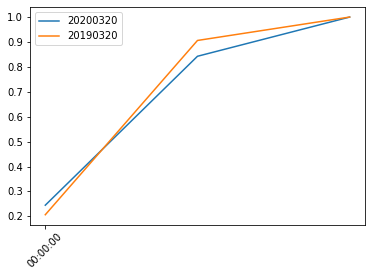

In [104]:
from datetime import datetime, timedelta
def datetime_range(start, end, delta):
    current = start
    while current < end:
        yield current
        current += delta

Tot = len(link_dict)
Cols = int(np.sqrt(Tot))

x = [dt.strftime('%H:%M:%S') for dt in 
           datetime_range(datetime(2020,3,20,0, 0,0), datetime(2020,3,20,23,45,59), 
           timedelta(minutes=time_min_interval))][:-1]

read_in_folder = './processed_data/20200320/'

with open(read_in_folder+'volume_dict_link_4.pkl', 'rb') as handle:
    count_data = pickle.load(handle)
    
count = 0

vol_link_true = np.zeros((N,len(link_dict)))

for i,val in enumerate(count_data.values()):
    
    tmp = val.T.reset_index()
    tmp.columns = ['time', 'val']
    tmp.index = pd.to_datetime(tmp.time, format='%H:%M:%S')
    tmp = tmp.resample(str(time_min_interval)+'T').sum().to_numpy()
#     print(vol_link_true.shape,' ',tmp.shape)
    vol_link_true[:,i] = tmp[:-1,0]
    if count == 0:
        df = val
    else:
        df += val
    count += 1


plt.plot(x,vol_link_true.sum(axis = 1)/max(vol_link_true.sum(axis = 1)),label = '20200320')

read_in_folder = './processed_data/20190320/'


with open(read_in_folder+'volume_dict_link_4.pkl', 'rb') as handle:
    count_data = pickle.load(handle)
    
count = 0

vol_link_true = np.zeros((N,len(link_dict)))

for i,val in enumerate(count_data.values()):
    
    tmp = val.T.reset_index()
    tmp.columns = ['time', 'val']
    tmp.index = pd.to_datetime(tmp.time, format='%H:%M:%S')
    tmp = tmp.resample(str(time_min_interval)+'T').sum().to_numpy()
#     print(vol_link_true.shape,' ',tmp.shape)
    vol_link_true[:,i] = tmp[:-1,0]
    if count == 0:
        df = val
    else:
        df += val
    count += 1

# df.T.plot()

plt.plot(x,vol_link_true.sum(axis = 1)/max(vol_link_true.sum(axis = 1)),label = '20190320')

axes = plt.axes()
x_values = axes.get_xticks()
x_len = len(x_values)
print(x_values)
new_x = [x_values[i] for i in range(0,N,4)]
print(new_x)
plt.xticks(new_x)
new_xlabel = [x[i] for i in range(0,N,4)]
axes.set_xticklabels(new_xlabel, rotation=45)
plt.gcf().autofmt_xdate()

plt.legend()
# print(vol_link_true.sum(axis = 1))

# print(vol_link_true.sum(axis = 1))

In [105]:
print(vol_link_est)

[[7.47048372e+02 8.80416197e+02 8.02806415e+02 8.59011086e+02
  8.48502228e+01 3.49200244e+03 1.42580273e+04 1.68864969e+04
  4.79751458e+03 2.52508380e+02 9.98831603e+02 1.43265853e+03
  9.51203401e+02 9.53854176e+02 1.10008766e+02 1.74095840e+03
  4.40093701e+03 1.93071576e+03 1.90881460e+03 3.13369862e+02
  1.16591377e+03 1.22602849e+02 5.82588275e+01 8.02356582e+02
  2.61646789e+02 2.50064841e+02 2.24386689e+02 4.54758340e+02
  6.59375951e+02 2.64112616e+02 2.94336875e+02 1.28071831e+02
  7.29544811e+02 0.00000000e+00 2.27953913e+02 1.04833478e+03
  6.90042080e+03 1.32360038e+02 3.16778223e+03 3.61534531e+03
  6.13492727e+03 4.63000805e+03 1.82679168e+02 4.74567666e+03
  5.03097897e+03 3.63219899e+02 1.26743310e+02 3.64084081e+02
  2.88257474e+02 6.28964950e+01 3.75515665e+02 2.19334312e+02
  3.35248810e+02 1.52647308e+02 9.61362381e+01 1.73546326e+02
  2.19197990e+02 1.93725021e+02 7.99228836e+02 6.28723346e+03
  6.22697706e+03 6.22083033e+02 3.98010786e+02 4.02315649e+02
  5.5639

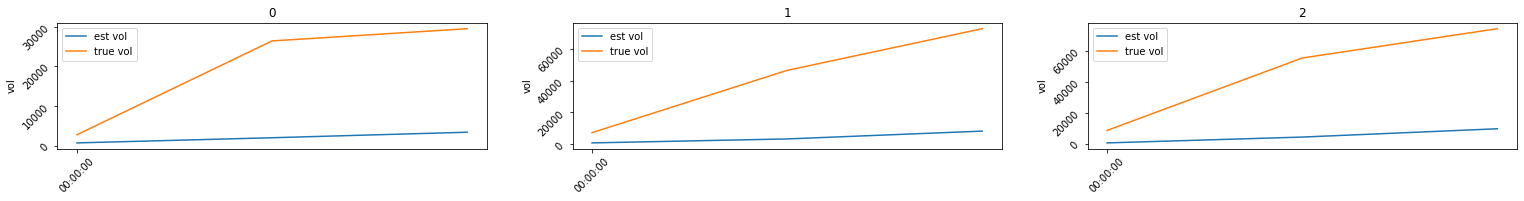

In [106]:
from datetime import datetime, timedelta
def datetime_range(start, end, delta):
    current = start
    while current < end:
        yield current
        current += delta

Tot = len(link_dict)
Cols = int(np.sqrt(Tot))

x = [dt.strftime('%H:%M:%S') for dt in 
           datetime_range(datetime(2020,3,20,0, 0,0), datetime(2020,3,20,23,45,59), 
           timedelta(minutes=time_min_interval))][:-1]

# Compute Rows required

Position = range(1,Tot + 1)

Rows = Tot // Cols 
Rows += Tot % Cols

fig = plt.figure(1,figsize=(5*Rows,5*Cols))
# plt.rcParams["figure.figsize"] = (30,20)
k = -1
for i in range(len(vol_link_true)):
  # add every single subplot to the figure with a for loop
    k +=1
    ax = fig.add_subplot(Rows,Cols,Position[k])
#     time_col = (pd.to_datetime(station_dict[name]['Datetime']).dt.time.astype(str))
#     print(time_col)
#     x = np.array(time_col.to_list())
#     x = np.arange(0,95,1)
    
#     print(a)
    ax.plot(x,vol_link_est[:,i], label = 'est vol')
    ax.plot(x,vol_link_true[:,i], label = 'true vol')
    
#     ax.plot(x,count(data))
    ax.tick_params(labelrotation=45)
    
    ax.set_title(i)
    ax.legend()
#     ax.set_xticklabels(x, rotation=45)

    ax.set_ylabel('vol')
    
    ########################
    x_values = ax.get_xticks()
#     print(x_values)
    x_len = len(x_values)

    new_x = [x_values[i] for i in range(0,N,20)]
#     print(new_x)
    ax.set_xticks(new_x)
    new_xlabel = [x[i] for i in range(0,N,20)]
    ax.set_xticklabels(new_xlabel, rotation=45)
plt.show()


[ 666008.84424033 2922132.88510385 3225097.15055379]


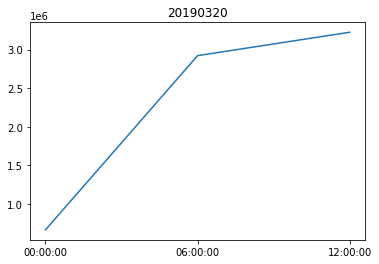

In [107]:
from datetime import datetime, timedelta
def datetime_range(start, end, delta):
    current = start
    while current < end:
        yield current
        current += delta

Tot = len(link_dict)
Cols = int(np.sqrt(Tot))

x = [dt.strftime('%H:%M:%S') for dt in 
           datetime_range(datetime(2020,3,20,0, 0,0), datetime(2020,3,20,23,49,59), 
           timedelta(minutes=time_min_interval))][:-1]

read_in_folder = './processed_data/20190320/'

with open(read_in_folder+'volume_dict_link_4.pkl', 'rb') as handle:
    count_data = pickle.load(handle)
    
count = 0

vol_link_true = np.zeros((N,len(link_dict)))

for i,val in enumerate(count_data.values()):
    
    tmp = val.T.reset_index()
    tmp.columns = ['time', 'val']
    tmp.index = pd.to_datetime(tmp.time, format='%H:%M:%S')
    tmp = tmp.resample(str(time_min_interval)+'T').sum().to_numpy()
#     print(vol_link_true.shape,' ',tmp.shape)
    vol_link_true[:,i] = tmp[:-1,0]
    if count == 0:
        df = val
    else:
        df += val
    count += 1

# df.T.plot()
x = [dt.strftime('%H:%M:%S') for dt in 
       datetime_range(datetime(2020,3,20,0, 0,0), datetime(2020,3,20,23,45,59), 
       timedelta(minutes=time_min_interval))][:-1]

plt.plot(x,vol_link_true.sum(axis = 1))

plt.title('20190320')

print(vol_link_true.sum(axis = 1))

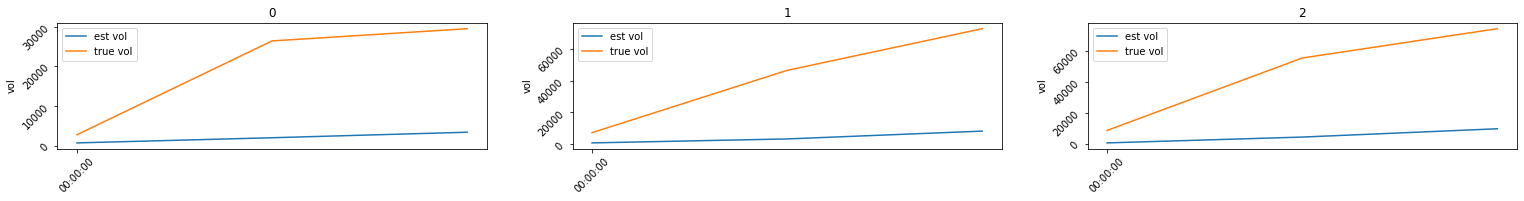

In [108]:
from datetime import datetime, timedelta
def datetime_range(start, end, delta):
    current = start
    while current < end:
        yield current
        current += delta

Tot = len(link_dict)
Cols = int(np.sqrt(Tot))

vol_link_est = np.zeros((N,len(link_dict)))
# print(vol_link_est.shape)
for idx, i in enumerate(OD_paths.values()):
    for ii in i:
        ii.q = q_vector_2d_2019[:,idx]
#         print(ii.q.shape)
        for iii in ii.link_list:
            vol_link_est[:,iii.ID] += ii.q/ii.cost *iii.length
#             print(vol_link_est)
#             print(iii.ID,' ', end = '')
#         print('')

x = [dt.strftime('%H:%M:%S') for dt in 
           datetime_range(datetime(2019,3,20,0, 0,0), datetime(2019,3,20,23,45,59), 
           timedelta(minutes=time_min_interval))][:-1]

# Compute Rows required

Position = range(1,Tot + 1)

Rows = Tot // Cols 
Rows += Tot % Cols

fig = plt.figure(1,figsize=(5*Rows,5*Cols))
# plt.rcParams["figure.figsize"] = (30,20)
k = -1
for i in range(len(vol_link_true)):
  # add every single subplot to the figure with a for loop
    k +=1
    ax = fig.add_subplot(Rows,Cols,Position[k])
#     time_col = (pd.to_datetime(station_dict[name]['Datetime']).dt.time.astype(str))
#     print(time_col)
#     x = np.array(time_col.to_list())
#     x = np.arange(0,95,1)
    
#     print(a)
    ax.plot(x,vol_link_est[:,i], label = 'est vol')
    ax.plot(x,vol_link_true[:,i], label = 'true vol')
    
#     ax.plot(x,count(data))
    ax.tick_params(labelrotation=45)
    
    ax.set_title(i)
    ax.legend()
#     ax.set_xticklabels(x, rotation=45)

    ax.set_ylabel('vol')
    
    ########################
    x_values = ax.get_xticks()
#     print(x_values)
    x_len = len(x_values)

    new_x = [x_values[i] for i in range(0,N,20)]
#     print(new_x)
    ax.set_xticks(new_x)
    new_xlabel = [x[i] for i in range(0,N,20)]
    ax.set_xticklabels(new_xlabel, rotation=45)
plt.show()

## Graph

In [112]:
dict_hd = pd.read_csv('./processed_data/hd_centroid.csv',sep=',')[['HD_ID', 'HD_NAME']]
dict_hd = centroid_df.sort_values(by='HD_ID', ascending=False).groupby('HD_ID').first().reset_index(drop = False)

print(dict_hd)

hd_name = dict_hd['HD_NAME'].to_numpy()
print(hd_name)

Tot = 26
Cols = int(np.sqrt(Tot))

Position = range(1,Tot + 1)

Rows = Tot // Cols 
Rows += Tot % Cols

fig = plt.figure(1,figsize=(5*Rows,5*Cols))
# plt.rcParams["figure.figsize"] = (30,20)
k = -1
count = 0

for i in range(Tot):
  # add every single subplot to the figure with a for loop
    k +=1
    ax = fig.add_subplot(Rows,Cols,Position[k])
#     time_col = (pd.to_datetime(station_dict[name]['Datetime']).dt.time.astype(str))
#     print(time_col)
#     x = np.array(time_col.to_list())
#     x = np.arange(0,95,1)
    
#     print(a)
    j = 0
#     while ((j < 2) & (count < path_flow.shape[0]-2)):
    count += 1
    j += 1
    print(count)
    ax.plot(hd_name,path_flow[count,:],label = 'from '+hd_name[count-1])
    ax.plot(hd_name,path_flow.T[count,:],label = 'to '+hd_name[count-1])
        
#     ax.plot(x,count(data))
    ax.tick_params(labelrotation=45)
    
    ax.set_title(i)
    ax.legend()
#     ax.set_xticklabels(x, rotation=45)
    ax.set_ylim([0,1e5])
    ax.set_ylabel('vol')
    
#     ########################
#     x_values = ax.get_xticks()
# #     print(x_values)
#     x_len = len(x_values)

#     new_x = [x_values[i] for i in range(0,95,20)]
# #     print(new_x)
#     ax.set_xticks(new_x)
#     new_xlabel = [x[i] for i in range(0,95,20)]
#     ax.set_xticklabels(new_xlabel, rotation=45)
fig.tight_layout()
fig.show()

# for i in range(1,path_flow.shape[0]-1):
#     print(i)
#     plt.scatter(hd_name,path_flow[i,1:-1],label = hd_name[i-1])
    
# plt.xticks(rotation = 45)
# plt.legend()
# plt.show()

NameError: name 'centroid_df' is not defined

In [113]:
## calculate traffic flow between health district
## 1. read in all path file
node_df = pd.read_csv('./processed_data/node_list.csv')

path_flow = np.zeros((28,28))

count = 1

vol_link_est = np.zeros((N,len(link_dict)))
print(vol_link_est.shape)
for idx, i in enumerate(OD_paths.values()):
    for ii in i:
        ii.q = q_vector_2d_2019[:,idx]
        

for key, value in OD_paths.items():
    q_sum = value[0].q.sum()
#     print('From ',from_region,' to ', to_region, ': ', q_sum)
    from_region = node_df.loc[key[0], 'Region']
    to_region = node_df.loc[key[1], 'Region']
    
#     print('from_region, ', from_region)
    path_flow[from_region,to_region] += q_sum
    
    count += 1
#     print(count)
# print(path_flow)

path_flow[:,27] = path_flow.sum(axis = 0)
path_flow[27,:] = path_flow.sum(axis = 1)

path_flow[:,0] += range(0,28)
path_flow[0,:] += range(0,28)

print(path_flow)
np.savetxt('path_flow_2020_new.csv',path_flow)

# for idx, i in enumerate(OD_paths.values()):
#     for ii in i:
#         ii.q = q_vector_2d_2020[:,idx]
#         print(ii.q.shape)
#         for iii in ii.link_list:
#             vol_link_est[:,iii.ID] += ii.q/ii.cost *iii.length
#             print(vol_link_est)
#             print(iii.ID,' ', end = '')
#         print('')

dict_hd = pd.read_csv('./processed_data/hd_features.csv',sep=',')[['HD_ID', 'HD_NAME']]
print(dict_hd)

hd_name = dict_hd['HD_NAME'].to_numpy()
print(hd_name)

Tot = 26
Cols = int(np.sqrt(Tot))

Position = range(1,Tot + 1)

Rows = Tot // Cols 
Rows += Tot % Cols

fig = plt.figure(1,figsize=(5*Rows,5*Cols))
# plt.rcParams["figure.figsize"] = (30,20)
k = -1
count = 0

for i in range(Tot):
  # add every single subplot to the figure with a for loop
    k +=1
    ax = fig.add_subplot(Rows,Cols,Position[k])
#     time_col = (pd.to_datetime(station_dict[name]['Datetime']).dt.time.astype(str))
#     print(time_col)
#     x = np.array(time_col.to_list())
#     x = np.arange(0,95,1)
    
#     print(a)
    j = 0
#     while ((j < 2) & (count < path_flow.shape[0]-2)):
    count += 1
    j += 1
    print(count)
    ax.plot(hd_name,path_flow[count,1:-1],label = 'from '+hd_name[count-1])
    ax.plot(hd_name,path_flow.T[count,1:-1],label = 'to '+hd_name[count-1])
        
#     ax.plot(x,count(data))
    ax.tick_params(labelrotation=45)
    
    ax.set_title(i)
    ax.legend()
#     ax.set_xticklabels(x, rotation=45)
    ax.set_ylim([0,1e5])
    ax.set_ylabel('vol')
    
#     ########################
#     x_values = ax.get_xticks()
# #     print(x_values)
#     x_len = len(x_values)

#     new_x = [x_values[i] for i in range(0,95,20)]
# #     print(new_x)
#     ax.set_xticks(new_x)
#     new_xlabel = [x[i] for i in range(0,95,20)]
#     ax.set_xticklabels(new_xlabel, rotation=45)
fig.tight_layout()
fig.show()

# for i in range(1,path_flow.shape[0]-1):
#     print(i)
#     plt.scatter(hd_name,path_flow[i,1:-1],label = hd_name[i-1])
    
# plt.xticks(rotation = 45)
# plt.legend()
# plt.show()

(3, 140)


IndexError: index 1806 is out of bounds for axis 1 with size 1806

## Plot map for health district
1. read in centroid data
2. read in path flow data
3. plot networkx network

algo 2:
for loop:
    1. plot the next ni largest edge of flow.
    2. 

In [114]:
centroid_df = pd.read_csv('./processed_data/hd_centroid.csv',sep=',')[['OBJECTID','HD_ID', 'HD_NAME', 'SPA_NAME', 
                                                                             'HD_2012','SPA_2012','xcoord','ycoord']]

centroid_df = centroid_df.sort_values(by='ycoord', ascending=False).groupby('HD_ID').first().reset_index(drop = False)

# print(centroid_df)
path_flow_df = np.genfromtxt('./processed_data/path_flow_2020_new.csv', delimiter=' ')

df = pd.read_csv ('file_name.csv')
print(df)
df_path = q_vector_2019_path + '/pathflow_2020_sym_beta'+\
                     str(np.format_float_scientific(penalty_beta, exp_digits=2))+'_gamma'+ \
                     str(np.format_float_scientific(penalty_gamma, exp_digits=2))+'.csv'

print(path_flow.shape)
node_df = pd.read_csv('./processed_data/node_list.csv')

(26, 26)


### plot all edge traffic volum in iteration.

In [116]:
num_regions = centroid_df.shape[0]

indexs = np.linspace(1,num_regions,num_regions).reshape(-1,1)

n_largest = 15

num_nodes_list = node_df.groupby(['hd']).size()

centroid_df['pos'] = centroid_df[['xcoord', 'ycoord']].apply(tuple, axis=1)
centroid_df['label'] = centroid_df['HD_NAME']+' '+ num_nodes_list.to_numpy().astype(str)

row, col = np.indices(path_flow.shape)+1
# print(path_flow)

path_flow_index = np.concatenate((row.reshape(-1,1),col.reshape(-1,1),path_flow.reshape(-1,1)), axis = 1)

# print(path_flow_index)

colors = ['red', 'orange', 'green', 'blue']

# weights = [15,11,7,3]
for i in range(4):
    plt.figure(i)

    if (i == 0):
        sorted_row_idx = np.argsort(path_flow_index[:,2])[-(i+1)*n_largest:]
    else:
        sorted_row_idx = np.argsort(path_flow_index[:,2])[-(i+1)*n_largest:-i*n_largest]
    print('sorted_row_idx, ', sorted_row_idx)
    
    plot_flows = path_flow_index[sorted_row_idx,:].astype(int)
    print('plot_flows, ', plot_flows)
    Edge_list = pd.DataFrame(columns=['from_node', 'to_node','volume'])
    
    Edge_list = Edge_list.append(pd.DataFrame(plot_flows, columns=Edge_list.columns), ignore_index=True)

    ## drop small value and keep n largest
    
    DG = nx.from_pandas_edgelist(Edge_list, source='from_node', target='to_node', edge_attr=['volume'], create_using=nx.DiGraph())
    
    DG.add_nodes_from(centroid_df['HD_ID'])
    
    node_attr = centroid_df.set_index('HD_ID').to_dict('index')

    nx.set_node_attributes(DG, node_attr)

    pos=nx.get_node_attributes(DG,'pos')
    node_label = nx.get_node_attributes(DG,'label')
    plt.rcParams['figure.figsize'] = [20, 20]
    nx.draw_networkx(DG,pos,labels = node_label,node_size=20,node_color='blue', font_size=20, edge_color='blue', width=volume,
                     horizontalalignment = 'right',verticalalignment = 'baseline',arrows=True, 
                     arrowstyle="->",arrowsize=20)
    
    edge_labels = nx.get_edge_attributes(DG, "volume")
    nx.draw_networkx_edge_labels(DG, pos, edge_labels,label_pos=0.3,verticalalignment = 'baseline',font_size = 10)
#     plt.title(node_label[i+1]+' has '+str(num_nodes)+' nodes')
    plt.savefig("./processed_data/graphs/network_pathflow_largest/largest5_"+str(i)+".png", format="PNG")
#     plt.close()

sorted_row_idx,  [341 563 274 342 273 267 418 344 263 339  34  29 271 362 440]
plot_flows,  [[                 14                   4  366231125841936384]
 [                 22                  18  395236015997976576]
 [                 11                  15  406798308476977152]
 [                 14                   5  412285112017747968]
 [                 11                  14  415924117548564544]
 [                 11                   8  429752572211888128]
 [                 17                   3  436413121595179008]
 [                 14                   7  456121197508165632]
 [                 11                   4  491978883030056960]
 [                 14                   2  585956134720897024]
 [                  2                   9  737568617708650496]
 [                  2                   4  784624966598393856]
 [                 11                  12  809525743871590656]
 [                 14                  25 1003186506442997760]
 [                 17     

NameError: name 'volume' is not defined

<Figure size 432x288 with 0 Axes>

In [24]:
num_regions = centroid_df.shape[0]

indexs = np.linspace(1,num_regions,num_regions).reshape(-1,1)

n_largest = 5

num_nodes_list = node_df.groupby(['hd']).size()

centroid_df['pos'] = centroid_df[['xcoord', 'ycoord']].apply(tuple, axis=1)
centroid_df['label'] = centroid_df['HD_NAME']+' '+ num_nodes_list.to_numpy().astype(str)

for i in range(centroid_df.shape[0]):
    plt.figure(i)
    
    num_nodes = node_df[node_df['hd'] == i+1].shape[0]

    from_list = path_flow[i,:].astype(int);
    to_list = path_flow[:,i].astype(int);
    
    region = np.ones((num_regions,1)) + i
    Edge_list = pd.DataFrame(columns=['from_node', 'to_node','volume'])
    
    from_np = np.concatenate((region,indexs,from_list.reshape(-1,1)), axis = 1)
    to_np = np.concatenate((indexs,region,to_list.reshape(-1,1)), axis = 1)
    
    sorted_row_idx = np.argsort(from_list)[-n_largest:]
    from_np = from_np[sorted_row_idx,:]
    
    sorted_row_idx = np.argsort(to_list)[-n_largest:]
    to_np = to_np[sorted_row_idx,:]
    
    Edge_list = Edge_list.append(pd.DataFrame(from_np, columns=Edge_list.columns), ignore_index=True)
    Edge_list = Edge_list.append(pd.DataFrame(to_np, columns=Edge_list.columns), ignore_index=True)

    ## drop small value and keep n largest
    
    DG = nx.from_pandas_edgelist(Edge_list, source='from_node', target='to_node', edge_attr=['volume'], create_using=nx.DiGraph())
    
    DG.add_nodes_from(centroid_df['HD_ID'])
    
    node_attr = centroid_df.set_index('HD_ID').to_dict('index')

    nx.set_node_attributes(DG, node_attr)

    pos=nx.get_node_attributes(DG,'pos')
    node_label = nx.get_node_attributes(DG,'label')
    plt.rcParams['figure.figsize'] = [20, 20]
    nx.draw_networkx(DG,pos,labels = node_label,node_size=20,node_color='blue', font_size=20, horizontalalignment = 'right',verticalalignment = 'baseline',arrows=True, arrowstyle="->",arrowsize=20)
    
    edge_labels = nx.get_edge_attributes(DG, "volume")
    nx.draw_networkx_edge_labels(DG, pos, edge_labels,label_pos=0.3,verticalalignment = 'baseline',font_size = 10)
    plt.title(node_label[i+1]+' has '+str(num_nodes)+' nodes')
    plt.savefig("./processed_data/graphs/network_pathflow/"+node_label[i+1]+".png", format="PNG")
    plt.close()

In [181]:
centroid_df

,HD_ID,OBJECTID,HD_NAME,SPA_NAME,HD_2012,SPA_2012,xcoord,ycoord,pos,label
0,1,2,Antelope Valley,Antelope Valley,5,1,-118.115735,34.632642,"(-118.115734617874, 34.6326421029592)",Antelope Valley 1
1,2,7,East Valley,San Fernando,19,2,-118.317157,34.296503,"(-118.317157281343, 34.2965025583538)",East Valley 2
2,3,10,Glendale,San Fernando,27,2,-118.261603,34.190522,"(-118.261603023937, 34.1905218059804)",Glendale 2
3,4,19,San Fernando,San Fernando,62,2,-118.569122,34.518857,"(-118.569122380429, 34.5188572308041)",San Fernando 2
4,5,25,West Valley,San Fernando,86,2,-118.617954,34.162893,"(-118.61795362698, 34.1628934087506)",West Valley 1
5,6,1,Alhambra,San Gabriel,3,3,-118.111237,34.085749,"(-118.111236977275, 34.0857486959696)",Alhambra 2
6,7,8,El Monte,San Gabriel,23,3,-117.979266,34.035923,"(-117.97926580513, 34.0359228940817)",El Monte 2
7,8,9,Foothill,San Gabriel,25,3,-117.907115,34.269546,"(-117.907115299865, 34.2695462285387)",Foothill 1
8,9,16,Pasadena,San Gabriel,50,3,-118.136064,34.160976,"(-118.136064158498, 34.1609758542138)",Pasadena 1
9,10,17,Pomona,San Gabriel,54,3,-117.815766,34.059918,"(-117.815766431958, 34.0599176287744)",Pomona 1
